In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel


In [19]:
d=pd.read_csv('https://raw.githubusercontent.com/bharathirajatut/python-data-science/master/Random%20Forest%20Regression%20-%20Boston%20Dataset/housing.csv')

In [20]:
d.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
m=datasets.load_boston()
X=pd.DataFrame(m.data,columns=m.feature_names)
y=pd.Series(m.target)

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.20,random_state=0)

In [25]:
rfr=RandomForestRegressor(n_estimators=40, random_state=0)

In [26]:
rfr.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [27]:
y_pred=rfr.predict(X_test)
print("mean Absolute error:",metrics.mean_absolute_error(y_pred,y_test))
print("mean Square error:",metrics.mean_squared_error(y_pred,y_test))
print("root mean Square error:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))


mean Absolute error: 2.7270343137254907
mean Square error: 19.71161096813725
root mean Square error: 4.4397760042751315


In [28]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7270343137254907
Mean Squared Error: 19.71161096813725
Root Mean Squared Error: 4.4397760042751315


In [29]:
feature_imp = pd.Series(rfr.feature_importances_,index=X.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


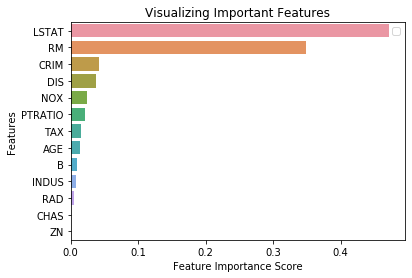

In [30]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [62]:
s=SelectFromModel(rfr,threshold=0.10)
s.fit(X_train,y_train)
X_tr=s.transform(X_train)
X_ts=s.transform(X_test)

numpy.ndarray

In [55]:
crf=RandomForestRegressor(n_estimators=1000)

In [56]:
crf.fit(X_tr, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [57]:
ycrf_pred=crf.predict(X_ts)


In [61]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ycrf_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ycrf_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ycrf_pred)))

Mean Absolute Error: 3.2070372549019637
Mean Squared Error: 28.54965649843143
Root Mean Squared Error: 5.343187859174654
